# Contra-Exemplo 1

In [ ]:
import graph_tool_extras as gte
import pandas as pd
import csv
import ast
from graph_tool import draw
import netpixi


PATH = '../Datasets/artigos.csv'
MAX_LINES = 20000  


Você **PODE** usar este notebook como referência para escrever seu próprio código, mas **NÃO PODE** usar uma proposta de rede que seja igual ou análoga.

## Dados

[Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [16]:
PATH = '../Datasets/artigos.csv'

## Por que não usar estes dados?

O uso de dados do Spotify já está muito batido, tanto na ciência dos dados em geral quanto na própria disciplina. Além disso, sabemos por experiência que há muitas possibilidades de direção sem potencial para o projeto.

## Por que não usar uma proposta igual ou análoga a esta?

As arestas são baseadas simplesmente em similaridade de atributos, sem uma definição clara de estado ou evento relacional.

## Leitura dos dados em disco

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o terceiro notebook da Aula 3.

In [ ]:
paper_refs_dict = {}

with open(PATH, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  

    count = 0
    for line in reader:
        if count >= MAX_LINES:
            break
        
        references_str = line[3]  # referências
        paper_id       = line[7]  # ID

        try:
            ref_list = ast.literal_eval(references_str)
            if not isinstance(ref_list, list):
                ref_list = []
        except:
            ref_list = []

        paper_refs_dict[paper_id] = ref_list
        
        count += 1

print(f"Lidas {count} linhas do CSV.")
print("Exemplo de 5 papers e suas referências:")
i = 0
for pid, refs in paper_refs_dict.items():
    print("ID:", pid, "- Refs:", refs)
    i += 1
    if i == 5:
        break


Lidas 20000 linhas do CSV.
Exemplo de 5 papers e suas referências:
ID: 4ab3735c-80f1-472d-b953-fa0557fed28b - Refs: ['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa16da-3cc8-4af6-9d66-48037e915d76', '35cb45c3-9408-4096-ab30-bc2e4de3fb5d', '661a342e-a911-4420-b67d-51c75d3b14e9', '779553f3-e4c1-456e-bc01-5eb9d9567541', 'b24ba5c0-fee8-4a3e-9330-17f6564856cd', 'fd1c676d-1296-4f19-89b4-17c7ecd270f3']
ID: 4ab39729-af77-46f7-a662-16984fb9c1db - Refs: ['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b1187381-cc24-471e-b288-5da09c3d4ca9', 'ecf8e7f0-cac6-47e4-9c29-f4241b0e1d7a']
ID: 4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de - Refs: ['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e57ca-d190-4bc7-b7ad-2e33aca2f574', '508ea83a-035b-4542-a315-9247c172d255', '666a65af-8657-43f6-b765-f2b72a16726a', '8100bfb7-3f6a-4269-bba8-7c4a6a578570', '8e035cc6-d692-4532-bb3c-a6a34b4db83a', 'e10a00d9-bb59-4f19-8f1c-85917bc03b5f']
ID: 4ab3a98c-3620-47ec-b578-884ecf4a6206 - Refs: ['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac52a1-dfa

## Construção do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o terceiro notebook da Aula 3.

In [ ]:
g_citation = gte.Graph(directed=True)

paper_ids = set(paper_refs_dict.keys())
for pid in paper_ids:
    g_citation.add_vertex_by_id(pid)

for citing_paper, ref_list in paper_refs_dict.items():
    for ref_id in ref_list:
        if ref_id in paper_ids:
            g_citation.add_edge_by_ids(citing_paper, ref_id)

print("Vértices (papers):", g_citation.num_vertices())
print("Arestas (citações):", g_citation.num_edges())


Vértices (papers): 20000
Arestas (citações): 2463


In [ ]:
vsize = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    vsize[v] = 5  
g_citation.vertex_properties["size"] = vsize

epw = g_citation.new_edge_property("double")
for e in g_citation.edges():
    epw[e] = 0.5  
g_citation.edge_properties["penwidth"] = epw

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)


gte.save(g_citation, 'papers_citation_100.net.gz')

render_obj = netpixi.render('papers_citation_100.net.gz', infinite=True)
render_obj


In [ ]:
g_citation = gte.clean(g_citation)

vsize = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    vsize[v] = 5 
g_citation.vertex_properties["size"] = vsize

epw = g_citation.new_edge_property("double")
for e in g_citation.edges():
    epw[e] = 0.5 
g_citation.edge_properties["penwidth"] = epw

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_100.net.gz')
netpixi.render('papers_citation_100.net.gz', infinite=True)


In [ ]:
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi


g_citation = gte.load('papers_citation_100.net.gz')

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    deg = v.in_degree() + v.out_degree()
    size_prop[v] = deg * 2 + 5  


g_citation.vp["size"] = size_prop


layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_degree_manual.net.gz')

r = netpixi.render('papers_citation_degree_manual.net.gz', infinite=True)
r


In [ ]:
from graph_tool.centrality import betweenness
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi

g_citation = gte.load('papers_citation_100.net.gz')

betw_map, _ = betweenness(g_citation)

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = betw_map[v]
    size_prop[v] = val * 1_000_000 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_betweenness.net.gz')
r = netpixi.render('papers_citation_betweenness.net.gz', infinite=True)
r


In [ ]:
from graph_tool.centrality import closeness
import math
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi


g_citation = gte.load('papers_citation_100.net.gz')

clos_map = closeness(g_citation)


size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = clos_map[v]
    if math.isinf(val) or math.isnan(val):
        size_prop[v] = 5.0
    else:
        size_prop[v] = val * 20 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_closeness.net.gz')
r = netpixi.render('papers_citation_closeness.net.gz', infinite=True)
r


In [ ]:
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi

def compute_burt_constraint(g):
    c_values = []
    for v in g.vertices():
        neighbors_v = list(v.out_neighbors())
        dv = len(neighbors_v)
        
        if dv == 0:
            c_values.append(0.0)
            continue
        
        p = {}
        for j in neighbors_v:
            p[j] = 1.0 / dv
        
        total_constraint = 0.0
        
        for j in neighbors_v:
            sum_q = 0.0
            for q in neighbors_v:
                if q == j:
                    continue
                if j in q.out_neighbors():
                    dq = q.out_degree()
                    p_qj = 1.0/dq if dq > 0 else 0.0
                else:
                    p_qj = 0.0
                sum_q += p[q] * p_qj
            total_constraint += (p[j] + sum_q)**2
        
        c_values.append(total_constraint)
    
    return c_values

g_citation = gte.load("papers_citation_100.net.gz")

constraint_vals = compute_burt_constraint(g_citation)

size_prop = g_citation.new_vertex_property("double")

for v, cval in zip(g_citation.vertices(), constraint_vals):
    size_prop[v] = cval * 12 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, "papers_citation_constraint.net.gz")
r = netpixi.render("papers_citation_constraint.net.gz", infinite=True)
r


In [ ]:
import graph_tool.draw as draw
import graph_tool.centrality as gt_c
import graph_tool_extras as gte
import netpixi

g_citation = gte.load("papers_citation_100.net.gz")

pagerank_map = gt_c.pagerank(g_citation)

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    val = pagerank_map[v]
    size_prop[v] = val * 10 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, "papers_citation_continuo.net.gz")
r = netpixi.render("papers_citation_continuo.net.gz", infinite=True)
r


In [ ]:
import graph_tool.topology as top
import graph_tool.draw as draw
import graph_tool_extras as gte
import netpixi


g_citation = gte.load("papers_citation_100.net.gz")

kcore_vals = top.kcore_decomposition(g_citation)

size_prop = g_citation.new_vertex_property("double")

for v in g_citation.vertices():
    size_prop[v] = kcore_vals[v] * 18 + 5

g_citation.vp["size"] = size_prop

layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, "papers_citation_discreto.net.gz")
r = netpixi.render("papers_citation_discreto.net.gz", infinite=True)
r


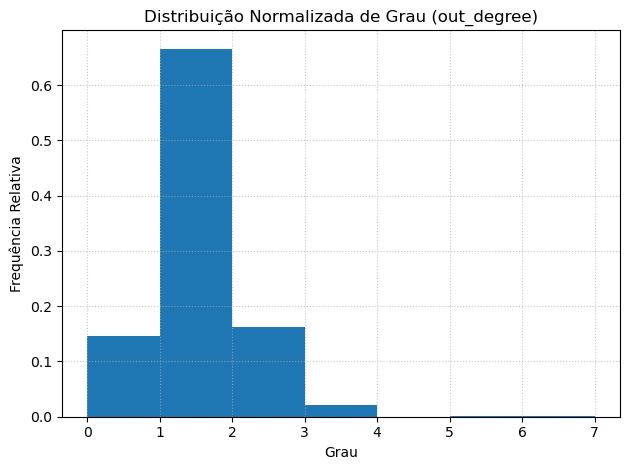

In [ ]:
import graph_tool_extras as gte
import matplotlib.pyplot as plt

g_citation = gte.load("papers_citation_100.net.gz")

degrees = [v.out_degree() for v in g_citation.vertices()]

if len(degrees) == 0:
    print("Nenhum vértice no grafo para analisar.")
else:
    min_deg, max_deg = min(degrees), max(degrees)
    plt.hist(degrees, bins=range(min_deg, max_deg + 2), density=True)
    plt.title("Distribuição Normalizada de Grau (out_degree)")
    plt.xlabel("Grau")
    plt.ylabel("Frequência Relativa")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig("distribuicao_outdegree.png", dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
import graph_tool_extras as gte
import netpixi
import graph_tool.draw as draw

g_citation = gte.load('papers_citation_100.net.gz')

if "paper_id" in g_citation.vp:
    paper_id_prop = g_citation.vp["paper_id"]
else:
    paper_id_prop = g_citation.new_vertex_property("string")
    for i, v in enumerate(g_citation.vertices()):
        paper_id_prop[v] = f"temp_{i}"
    g_citation.vp["paper_id"] = paper_id_prop

degree_prop = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    degree_prop[v] = v.in_degree() + v.out_degree()

g_citation.vp["degree"] = degree_prop

sorted_by_degree = sorted(g_citation.vertices(), 
                          key=lambda vert: degree_prop[vert],
                          reverse=True)

print("Top 10 nós por grau:")
for v in sorted_by_degree[:10]:
    print(f"Paper ID: {paper_id_prop[v]} - Grau: {degree_prop[v]}")

layout = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout)


gte.save(g_citation, 'papers_citation_degree_withid.net.gz')

r = netpixi.render('papers_citation_degree_withid.net.gz', infinite=True)
r


Top 10 nós por grau:
Paper ID: temp_124 - Grau: 61.0
Paper ID: temp_366 - Grau: 40.0
Paper ID: temp_406 - Grau: 35.0
Paper ID: temp_73 - Grau: 19.0
Paper ID: temp_132 - Grau: 16.0
Paper ID: temp_352 - Grau: 15.0
Paper ID: temp_196 - Grau: 14.0
Paper ID: temp_391 - Grau: 13.0
Paper ID: temp_365 - Grau: 11.0
Paper ID: temp_393 - Grau: 10.0


In [ ]:
import graph_tool_extras as gte
import graph_tool.draw as draw
import netpixi

from graph_tool.centrality import betweenness, closeness, pagerank
from graph_tool.topology import kcore_decomposition

g_citation = gte.load('papers_citation_100.net.gz')

if "paper_id" in g_citation.vp:
    paper_id_prop = g_citation.vp["paper_id"]
else:
    paper_id_prop = g_citation.new_vertex_property("string")
    for i, v in enumerate(g_citation.vertices()):
        paper_id_prop[v] = f"temp_{i}"
    g_citation.vp["paper_id"] = paper_id_prop


degree_prop = g_citation.new_vertex_property("double")
for v in g_citation.vertices():
    degree_prop[v] = v.in_degree() + v.out_degree()


betw_prop, _ = betweenness(g_citation)
clos_prop = closeness(g_citation)
page_prop = pagerank(g_citation)
kcore_prop = kcore_decomposition(g_citation)


def top5_sorted(vert_prop):
    """Retorna os vértices ordenados decrescentemente por vert_prop"""
    return sorted(g_citation.vertices(), key=lambda v: vert_prop[v], reverse=True)[:5]

top5_deg = top5_sorted(degree_prop)
top5_betw = top5_sorted(betw_prop)
top5_clos = top5_sorted(clos_prop)
top5_page = top5_sorted(page_prop)
top5_kcore = top5_sorted(kcore_prop)

print("Top 5 por Degree:")
for v in top5_deg:
    print(f" {paper_id_prop[v]}  (degree={degree_prop[v]})")

print("\nTop 5 por Betweenness:")
for v in top5_betw:
    print(f" {paper_id_prop[v]}  (betw={betw_prop[v]})")

print("\nTop 5 por Closeness:")
for v in top5_clos:
    print(f" {paper_id_prop[v]}  (clos={clos_prop[v]})")

print("\nTop 5 por PageRank:")
for v in top5_page:
    print(f" {paper_id_prop[v]}  (pagerank={page_prop[v]})")

print("\nTop 5 por K-Core:")
for v in top5_kcore:
    print(f" {paper_id_prop[v]}  (kcore={kcore_prop[v]})")

deg_ids = {paper_id_prop[v] for v in top5_deg}
betw_ids = {paper_id_prop[v] for v in top5_betw}
clos_ids = {paper_id_prop[v] for v in top5_clos}
page_ids = {paper_id_prop[v] for v in top5_page}

common_any = deg_ids & betw_ids & clos_ids & page_ids
print("\nAparecem no TOP 5 de (Degree, Betweenness, Closeness, PageRank):", common_any)


Top 5 por Degree:
 temp_124  (degree=61.0)
 temp_366  (degree=40.0)
 temp_406  (degree=35.0)
 temp_73  (degree=19.0)
 temp_132  (degree=16.0)

Top 5 por Betweenness:
 temp_396  (betw=9.181586745127498e-05)
 temp_73  (betw=7.512207336922499e-05)
 temp_137  (betw=7.094862484871248e-05)
 temp_21  (betw=4.1734485205125e-05)
 temp_207  (betw=3.3387588164099995e-05)

Top 5 por Closeness:
 temp_0  (clos=1.0)
 temp_1  (clos=1.0)
 temp_2  (clos=1.0)
 temp_3  (clos=1.0)
 temp_4  (clos=1.0)

Top 5 por PageRank:
 temp_124  (pagerank=0.059987826279008546)
 temp_366  (pagerank=0.04232622668373393)
 temp_406  (pagerank=0.036382830718410406)
 temp_429  (pagerank=0.023297702635674333)
 temp_73  (pagerank=0.016261365725605735)

Top 5 por K-Core:
 temp_15  (kcore=2)
 temp_21  (kcore=2)
 temp_22  (kcore=2)
 temp_25  (kcore=2)
 temp_42  (kcore=2)

Aparecem no TOP 5 de (Degree, Betweenness, Closeness, PageRank): set()


In [ ]:
import graph_tool_extras as gte
from graph_tool.centrality import betweenness

g_citation = gte.load('papers_citation_100.net.gz')
betw_map, _ = betweenness(g_citation)
sorted_by_betw = sorted(g_citation.vertices(), key=lambda v: betw_map[v], reverse=True)

print("Top 10 vértices com maior betweenness (possíveis pontes):")
for v in sorted_by_betw[:10]:
    print(f"Vértice {int(v)} -- betw: {betw_map[v]}")  


Top 10 vértices com maior betweenness (possíveis pontes):
Vértice 396 -- betw: 9.181586745127498e-05
Vértice 73 -- betw: 7.512207336922499e-05
Vértice 137 -- betw: 7.094862484871248e-05
Vértice 21 -- betw: 4.1734485205125e-05
Vértice 207 -- betw: 3.3387588164099995e-05
Vértice 252 -- betw: 2.9214139643587494e-05
Vértice 318 -- betw: 2.7127415383331247e-05
Vértice 109 -- betw: 2.5040691123074996e-05
Vértice 144 -- betw: 2.5040691123074996e-05
Vértice 321 -- betw: 2.5040691123074996e-05


Distribuição de k-core:
k=1: 396 nós
k=2: 95 nós


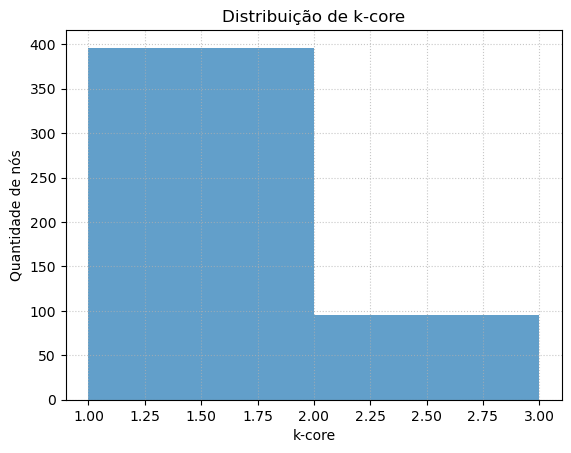

In [ ]:
import graph_tool_extras as gte
import matplotlib.pyplot as plt
from graph_tool.topology import kcore_decomposition

g_citation = gte.load("papers_citation_100.net.gz")
kcore_prop = kcore_decomposition(g_citation)
kcores = [kcore_prop[v] for v in g_citation.vertices()]

freq = {}
for k in kcores:
    freq[k] = freq.get(k, 0) + 1

print("Distribuição de k-core:")
for k, count in sorted(freq.items()):
    print(f"k={k}: {count} nós")

plt.hist(kcores, bins=range(int(min(kcores)), int(max(kcores)+2)), alpha=0.7)
plt.title("Distribuição de k-core")
plt.xlabel("k-core")
plt.ylabel("Quantidade de nós")
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


## Finalização do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o quarto e quinto notebooks da Aula 3.

In [39]:
layout_citation = draw.sfdp_layout(g_citation)
gte.move(g_citation, layout_citation)

gte.save(g_citation, 'papers_citation_100.net.gz')
render_obj = netpixi.render('papers_citation_100.net.gz', infinite=True)
render_obj


## Visualização do grafo

Para lembrar os detalhes sobre as bibliotecas e funções, reveja o quarto e quinto notebooks da Aula 3.

In [25]:
import netpixi

In [26]:
netpixi.render('papers_citation.net.gz');

<div class="alert alert-block alert-info">
   <strong>DICA:</strong> Você pode clicar na aba
   <img style="vertical-align: middle" src="attachment:20cd3d92-3cca-4d4c-a4f2-1f2a61958c34.png" alt"toc.png">
   à esquerda para navegar por seção.
</div>